In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from util import *

sns.set(font_scale=1.5)

In [2]:
df_change = load_change()[["prefix","run","iteration","size",
        "incremental.healthy","incremental.timeout","incremental.total[ms]",
        "standalone.healthy","standalone.timeout","standalone.total[ms]"
]]

In [3]:
df = df_change

df = df[df['iteration']==1] # Exclude initial (batch equivalent) analysis data 
df = df[validResult(df, 'incremental') & validResult(df, 'standalone')]

short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=[
                 'incremental.total[ms]'
                ,'standalone.total[ms]'])

short

,prefix,run,iteration,variable,value
0,0,0,1,incremental.total[ms],23.139660
1,0,1,1,incremental.total[ms],24.817609
2,0,2,1,incremental.total[ms],39.285098
3,0,3,1,incremental.total[ms],24.872203
4,0,4,1,incremental.total[ms],20.574341
...,...,...,...,...,...
695,60,45,1,standalone.total[ms],395.028997
696,60,46,1,standalone.total[ms],320.691560
697,60,47,1,standalone.total[ms],357.057529
698,60,48,1,standalone.total[ms],316.226623


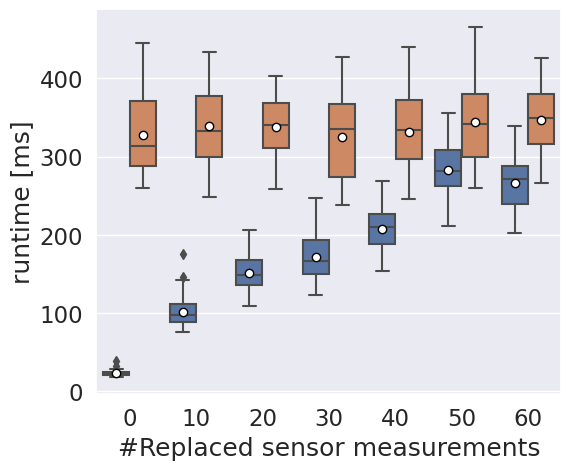

In [6]:
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}
def subplot(df, ax, ylabel=None, xlabel=None, legend=False, dfx_name="prefix", dfy_name="value", hue="variable"):
    sns.boxplot(data=df, ax=ax, x=dfx_name, y=dfy_name, hue=hue, showmeans=True, meanprops=meanprops)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    ax.get_legend().set_visible(legend)
    #ax.axvline(0.5,0,1,color='purple')
    
df = df_change

df = df[df['iteration']==1] # Exclude initial (batch equivalent) analysis data 
df = df[validResult(df, 'incremental') & validResult(df, 'standalone')] # Expect both data point to be correct
short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=[
                 'incremental.total[ms]'
                ,'standalone.total[ms]'])

fig, axes = plt.subplots(figsize=(6,5))
#sns.boxplot(data=short, ax=axes, x='prefix', y='value', hue='variable', showmeans=True, meanprops=meanprops)
subplot(short, axes, ylabel='runtime [ms]', xlabel='#Replaced sensor measurements')
fig.savefig("figures/change-sh.pdf", bbox_inches='tight')